### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [338]:
data = pd.read_csv('data/coupons.csv')

In [339]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [340]:
'''
We begin with a few objectives here:
- Explore the data and make note of the total observations/instances in the coupons file
- Rename or update and column names as necessary
- Identify null values and investigate unique values for some of the columns
'''

# Begin investigation of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [341]:
# Fix the `passanger` typo in the dataframe. Confirm changes with head() or info()
data = data.rename(columns={'passanger':'passenger'})
# data.info()
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [342]:
# Get count of null values in the columns
null_values = data.isnull().sum()
null_values

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [343]:
# There are null values in the columns in ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']. 
# In particular, there are several null values in 'car' (12,576)
car_column = data['car']
print('Car', car_column.unique())

carry_away = data['CarryAway']
print('Carry Away', carry_away.unique())

Car [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
Carry Away [nan '4~8' '1~3' 'gt8' 'less1' 'never']


3. Decide what to do about your missing data -- drop, replace, other...

In [344]:
'''
There are several null values in one column in particular. 
I don't want to get rid of the rest of that data so let's first exclude the `car` column. Then we'll use dropna() on this subset
'''

# Assign `cleaned` to the original dataframe and exclude the `car` column
cleaned = data.drop(columns=['car'])
cleaned = cleaned.dropna()
cleaned.info()

# Now end up with a total of 12,079 non-null instances in a dataframe we call `cleaned`

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon? 



In [345]:
'''
After progressing through the project, I found I would be grabbing the proportion of observations that accepted the coupon several times.
I decided to create a function called getProportionAccepted to return this 
'''

def getProportionAccepted(df):
    return df['Y'].value_counts(normalize=True)

# Find the total where Y = 1 which denotes a user accepts the coupon. Use n=
# y_vals = cleaned['Y'].value_counts(normalize=True)
y_vals = getProportionAccepted(cleaned)
y_vals

# We can see that 56.9% of the total users in the cleaned dataset chose to accept the coupon

Y
1    0.569335
0    0.430665
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

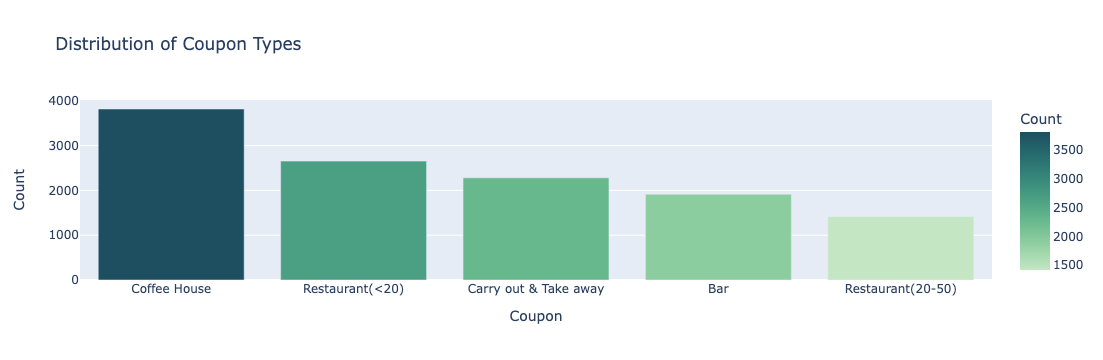

In [346]:
# Get just the 'coupon' column
coupon = cleaned['coupon']

# Sum the counts of unique values in coupon
coupon_count = cleaned['coupon'].value_counts()

# Create a bar plot, displaying the counts of each unique coupon type in the coupon data
coupon_plot = px.bar(
    coupon_count, 
    title='Distribution of Coupon Types', 
    labels={'coupon':'Coupon', 'value': 'Count'}, 
    color='value', 
    color_continuous_scale=px.colors.sequential.Blugrn)
coupon_plot

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



[Text(0.5, 0, 'Temperature °F')]

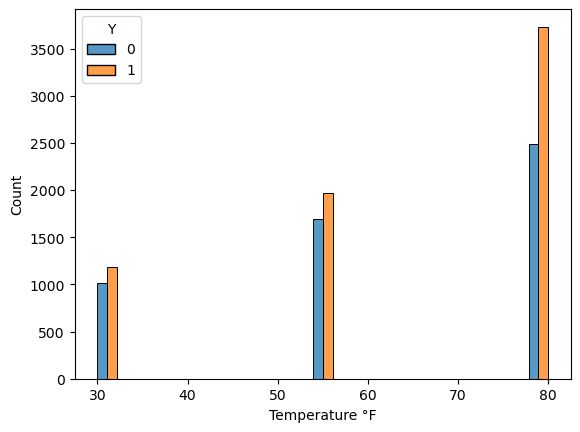

In [347]:
'''
Visualizing the temperature column using both plotly and seaborn. Use color/hue to compare temperatures between 
instances where Y == 0 and Y == 1
'''

# Creating the histogram using plotly
temp_plot = px.histogram(
    cleaned,
    x='temperature',
    color='Y',
    title='Counts of Temperature',
    labels={'temperature': 'Temperature \N{DEGREE SIGN}F'},
    barmode='group')
temp_plot

# Now a histogram with seaborn
seaborn_temp_plot = sns.histplot(data=cleaned, x='temperature', hue='Y', multiple='dodge')
seaborn_temp_plot.set(xlabel='Temperature \N{DEGREE SIGN}F')

In [348]:
'''
At first glance, there isn't a strong indication that temperature influences whether a coupon will be used or not. 
From the output below, temperatures at 30 and 55 degrees had about a 50/50 split between those that used coupons and those that did not.
For temperatures at 80 degrees Fahrenheit, there does appear to be slightly more users of coupons compared to those that chose not to.
I investigate this further using the function to return the proporations. At 80 degrees, almost 60% used coupons.


I cleaned up the code once I created the function. Originally I had:

    temp_ratio_30 = cleaned.query('temperature == 30')
    temp_ratio_30 = getProportionAccepted(temp_ratio_30)

    temp_ratio_55 = cleaned.query('temperature == 55')
    temp_ratio_55 = getProportionAccepted(temp_ratio_55)

    temp_ratio_80 = cleaned.query('temperature == 80')
    temp_ratio_80 = getProportionAccepted(temp_ratio_80)

    print('Temp 30 Ratio:', temp_ratio_30)
    print('Temp 55 Ratio:', temp_ratio_55)
    print('Temp 80 Ratio:', temp_ratio_80)
'''

print('Temp 30 Ratio:', getProportionAccepted(cleaned.query('temperature == 30')))
print('Temp 55 Ratio:', getProportionAccepted(cleaned.query('temperature == 55')))
print('Temp 80 Ratio:', getProportionAccepted(cleaned.query('temperature == 80')))


Temp 30 Ratio: Y
1    0.53713
0    0.46287
Name: proportion, dtype: float64
Temp 55 Ratio: Y
1    0.537138
0    0.462862
Name: proportion, dtype: float64
Temp 80 Ratio: Y
1    0.599646
0    0.400354
Name: proportion, dtype: float64


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [349]:
# Create bar dataframe using cleaned dataframe
bar = cleaned[cleaned['coupon'] == 'Bar']
bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passenger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [350]:
# Now updated to use the getProportionAccepted function I made--

# bar_ratio = bar['Y'].value_counts(normalize=True)
# bar_ratio
# bar_ratio[1]

bar_accepted = (getProportionAccepted(bar)[1] * 100).round(1)
print(f'The proportion of bar coupons that were accepted is {getProportionAccepted(bar)[1]}, or {bar_accepted}%')

The proportion of bar coupons that were accepted is 0.41191845269210664, or 41.2%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [351]:
# Let's look at the unique values in the 'Bar' column
bar['Bar'].unique()

# Get the data for those that went to a bar 3 or fewer times a month vs those that went more than 3 times. Use unique() again to confirm
three_or_fewer = ['never', 'less1', '1~3']
bar_3_or_fewer = bar.query('Bar in @three_or_fewer')
bar_greater_than_3 = bar.query('Bar not in @three_or_fewer')
# bar_3_or_fewer['Bar'].unique()
# bar_greater_than_3['Bar'].unique()

# Using index [1] to get the value where Y == 1 in the return
print('Bar attendance 3 or fewer:', getProportionAccepted(bar_3_or_fewer)[1])
print('Bar attendance greater than 3:', getProportionAccepted(bar_greater_than_3)[1])

Bar attendance 3 or fewer: 0.37267441860465117
Bar attendance greater than 3: 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [352]:
'''
There are a few things to filter/query on here:

- I plan to make a list called 'not_more_than_once_a_month' that will hold the opposite 
values that I want. This way I can use a negative or 'not' similar to what was done in the bar attendance comparison above. 
- 'age' values are all strings, so I'll look at the unique values in this column and determine if I can use a comparison > or 
if I need to convert them in some way.

I'll create a variable, drivers_A, to hold the data meeting the criteria:

- 'Bar not in @more_than_once_a_month'
- 'age > 25'

Then I'll create a separate variable, drivers_B, to hold the data opposite of the criteria. 
Once this is settled, I can use the function I made above to return the acceptance rate(s)
'''

# Look at the age values:
print('unique age values', bar['age'].unique())

# Create the lists used in my queries
not_more_than_once_a_month = ['never', 'less1']
invalid_ages = ['21', 'below21']

# Set my variables
drivers_A = bar.query('Bar not in @not_more_than_once_a_month and age not in @invalid_ages')
drivers_B = bar[~bar.index.isin(drivers_A.index)]

# Print the acceptance rates
print('drivers_A acceptance:', getProportionAccepted(drivers_A)[1])
print('drivers_B acceptance:', getProportionAccepted(drivers_B)[1])

# Confirming drivers_A instances + drivers_B instances equals total cleaned
# drivers_A.info()
# drivers_B.info()
# cleaned.info()

unique age values ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
drivers_A acceptance: 0.6898263027295285
drivers_B acceptance: 0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [365]:
# Look at passenger and occupation values
# print('unique passenger values', bar['passenger'].unique())
# print('unique occupations', bar['occupation'].unique())
# use string method to not include 'occupation' of 'Farming Fishing & Forestry'

invalid_passengers = ['Alone', 'Kid(s)']

# Query on the same check for those that go to bars more than once a month
drivers_C = bar.query('Bar not in @not_more_than_once_a_month')

# Then query for where passenger is not in the invalid passengers list
drivers_C = drivers_C.query('passenger not in @invalid_passengers')

#  Finally grab the entries where the occupation is NOT (using `~`) "Farming Fishing & Forestry"
drivers_C = drivers_C[~drivers_C['occupation'].str.contains("Farming Fishing & Forestry")]
drivers_D = bar[~bar.index.isin(drivers_C.index)]

# Print the acceptance rates
print('drivers_C acceptance:', getProportionAccepted(drivers_C))
# print('drivers_C acceptance:', getProportionAccepted(drivers_C)[1])
# print('drivers_D acceptance:', getProportionAccepted(drivers_D)[1])

drivers_C acceptance: Y
1    0.714286
0    0.285714
Name: proportion, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  